# Analysis of Variance (ANOVA)

In [5]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [29]:
#Make/fake some data
np.random.seed(1663)
n = 1000

salaries = np.random.normal(50000, 10000, n)
majors = ['Engineering', 'Computer Science', 'Sociology', 'Education'] 
school_types = ['Public', 'Private']
ages = np.random.randint(22, 65, n)
genders = ['Male', 'Female']

data = {
    'Major': np.random.choice(majors, size=n),
    'Salary': salaries,
    'School_Type': np.random.choice(school_types, size=n),
    'Age': ages,
    'Gender': np.random.choice(genders, size=n)
}

df = pd.DataFrame(data)
df.head()

,Major,Salary,School_Type,Age,Gender
0,Engineering,56976.869985,Public,63,Female
1,Sociology,65131.253756,Private,57,Female
2,Engineering,48578.992878,Public,37,Male
3,Computer Science,57645.485173,Public,45,Male
4,Sociology,48566.995676,Public,46,Female


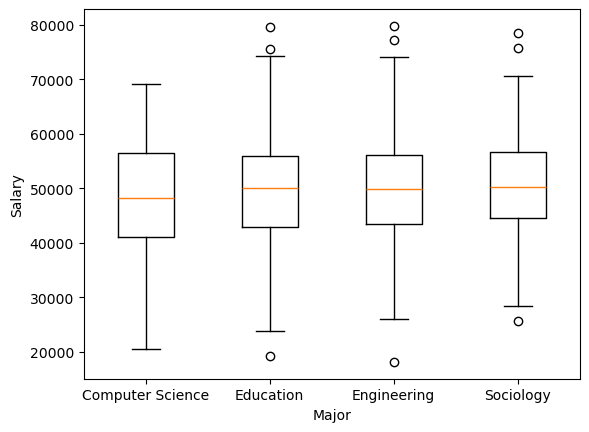

Major
Computer Science    48549.427763
Education           49664.358629
Engineering         50070.233473
Sociology           50372.767963
Name: Salary, dtype: float64


In [11]:
#Box plots by factor (major)
major_grouped_salary = df.groupby('Major')['Salary'].apply(list)
categories = major_grouped_salary.index
values = major_grouped_salary.values
plt.boxplot(values, labels=categories)
plt.xlabel('Major')
plt.ylabel('Salary')
plt.show()

#Means by factor (major)
grouped_means = df.groupby('Major')['Salary'].mean()
print(grouped_means)

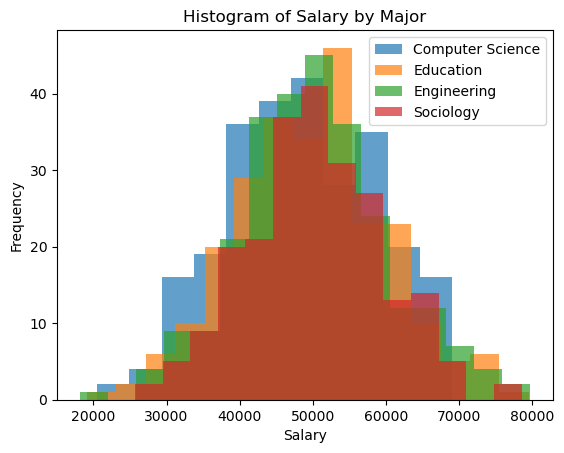

In [13]:
#ANOVA Assumption 1: Normally distributed data
grouped_data = df.groupby('Major')

#Plot histogram for each group
for group_name, group_data in grouped_data:
    plt.hist(group_data['Salary'], bins='auto', alpha=0.7, label=group_name)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary by Major')
plt.legend()

plt.show()

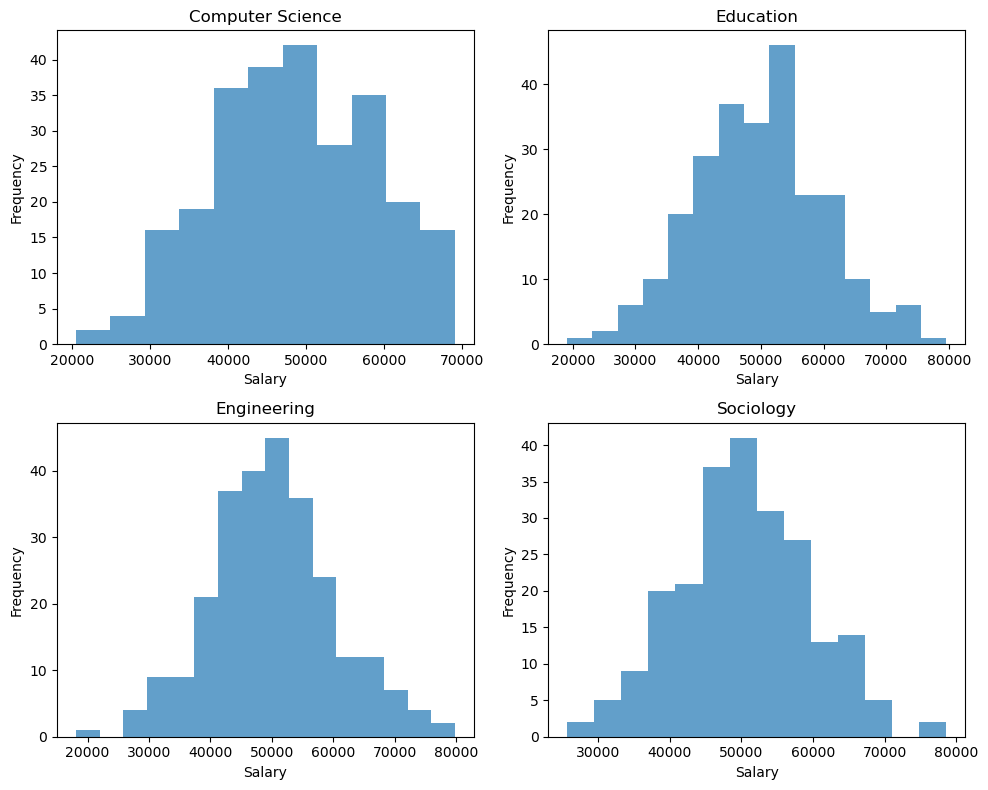

In [15]:
#ANOVA Assumption 1: Normally distributed data
grouped_data = df.groupby('Major')

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Flatten the subplots grid
axs = axs.flatten()

#Plot histogram for each group in a separate subplot
for i, (group_name, group_data) in enumerate(grouped_data):
    axs[i].hist(group_data['Salary'], bins='auto', alpha=0.7)
    axs[i].set_title(group_name)
    axs[i].set_xlabel('Salary')
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [17]:
#Shapiro-Wilk statistical test for normality assumption

grouped_data = df.groupby('Major')

#Perform Shapiro-Wilk test for each group
for group_name, group_data in grouped_data:
    salaries = group_data['Salary']
    shapiro_test = shapiro(salaries)
    test_statistic = shapiro_test.statistic
    p_value = shapiro_test.pvalue
    
    print(f"Shapiro-Wilk Test Results for {group_name}")
    print("Test Statistic:", test_statistic)
    print("p-value:", p_value)
    
#Null hypothesis: Data are normally distributed. If p is less than cutoff, reject the null of normally distributed data.

Shapiro-Wilk Test Results for Computer Science
Test Statistic: 0.9896420295947741
p-value: 0.0635599007772131
Shapiro-Wilk Test Results for Education
Test Statistic: 0.9969346799924981
p-value: 0.9102542746507691
Shapiro-Wilk Test Results for Engineering
Test Statistic: 0.9947682686673439
p-value: 0.5073180668323781
Shapiro-Wilk Test Results for Sociology
Test Statistic: 0.9975648294272212
p-value: 0.9816239816004501


In [19]:
#Levene statistical test for homogeneous variance
levene_test = levene(df['Salary'][df['Major'] == 'Computer Science'],
                     df['Salary'][df['Major'] == 'Engineering'],
                     df['Salary'][df['Major'] == 'Education'],
                     df['Salary'][df['Major'] == 'Sociology'])

test_statistic = levene_test.statistic
p_value = levene_test.pvalue

print("Levene's Test Results:")
print("Test Statistic:", test_statistic)
print("p-value:", p_value)
#Null hypothesis: Variances are equal.  If p-value is less than cutoff, reject null that variances are equal

Levene's Test Results:
Test Statistic: 1.330581121381173
p-value: 0.2630054644425043


In [23]:
#Perform one-way ANOVA with statsmodels
model = ols('Salary ~ Major', data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)
#Null hypothesis: All means are equal

             df        sum_sq       mean_sq           F        PR(>F)
Major       3.0  3.260960e+10  1.086987e+10  118.902956  8.064028e-66
Residual  996.0  9.105228e+10  9.141795e+07         NaN           NaN


In [20]:
#Alternatively, perform one-way ANOVA with scipy's f_oneway function
groups = []
for major, group in df.groupby('Major')['Salary']:
    groups.append(group)

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)
#Null hypothesis: All means are equal
#The associated p-value indicates the probability of observing such an F-statistic under the null hypothesis (no group differences).
#If the p-value is below cutoff, we reject the null hypothesis and conclude that there are significant differences between the groups.

F-statistic: 1.5819447686925954
p-value: 0.1921048349775969


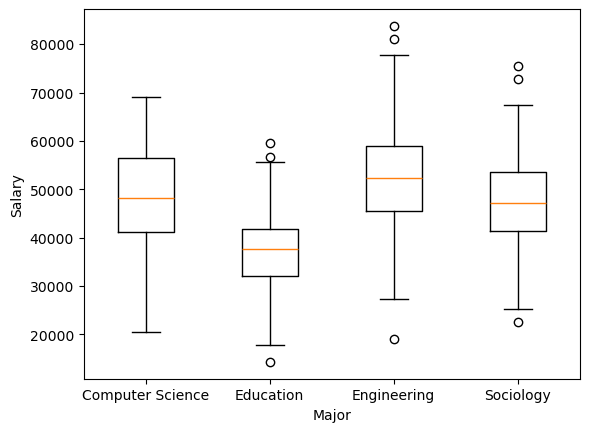

Major
Computer Science    48549.427763
Education           37248.268972
Engineering         52573.745146
Sociology           47372.767963
Name: Salary, dtype: float64


In [33]:
#Create some differences!
df.loc[df['Major'] == 'Engineering', 'Salary'] *= 1.05
df.loc[df['Major'] == 'Education', 'Salary'] *= 0.75
df.loc[df['Major'] == 'Sociology', 'Salary'] -= 3000

major_grouped_salary = df.groupby('Major')['Salary'].apply(list)
categories = major_grouped_salary.index
values = major_grouped_salary.values
plt.boxplot(values, labels=categories)
plt.xlabel('Major')
plt.ylabel('Salary')
plt.show()

grouped_means = df.groupby('Major')['Salary'].mean()
print(grouped_means)

In [24]:
#Perform one-way ANOVA with statsmodels
model = ols('Salary ~ Major', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(anova_table)

             df        sum_sq       mean_sq           F        PR(>F)
Major       3.0  3.260960e+10  1.086987e+10  118.902956  8.064028e-66
Residual  996.0  9.105228e+10  9.141795e+07         NaN           NaN


In [26]:
#Perform one-way ANOVA with scipy's f_oneway function
groups = []
for major, group in df.groupby('Major')['Salary']:
    groups.append(group)

f_stat, p_value = f_oneway(*groups)

#Print the results
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 118.9029558750706
p-value: 8.064028043020817e-66


In [35]:
#Tukey-Kramer Test for Equal Means Between Groups
model = ols('Salary ~ Major', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=1)
tukey_results = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Major'], alpha=0.05)
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1         group2     meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------------------
Computer Science   Education -11301.1588    0.0 -13480.2573 -9122.0603   True
Computer Science Engineering   4024.3174    0.0   1866.1962  6182.4386   True
Computer Science   Sociology  -1176.6598 0.5305  -3417.7626   1064.443  False
       Education Engineering  15325.4762    0.0  13158.7436 17492.2087   True
       Education   Sociology   10124.499    0.0   7875.1025 12373.8955   True
     Engineering   Sociology  -5200.9772    0.0  -7430.0581 -2971.8963   True
-----------------------------------------------------------------------------


In [37]:
#Two Way ANOVA
n = 1000

salaries = np.random.normal(50000, 10000, n)
majors = ['Engineering', 'Computer Science', 'Sociology', 'Education'] 
school_types = ['Public', 'Private']
ages = np.random.randint(22, 65, n)
genders = ['Male', 'Female']

data = {
    'Major': np.random.choice(majors, size=n),
    'Salary': salaries,
    'School_Type': np.random.choice(school_types, size=n),
    'Age': ages,
    'Gender': np.random.choice(genders, size=n)
}

df = pd.DataFrame(data) 
df.head()

,Major,Salary,School_Type,Age,Gender
0,Engineering,60637.698834,Private,32,Female
1,Computer Science,53729.919630,Private,27,Male
2,Education,49605.402663,Private,58,Male
3,Sociology,50447.198652,Public,28,Male
4,Computer Science,52684.645748,Private,32,Male


In [39]:
#Means by Major
grouped_by_major = df.groupby('Major')['Salary'].mean()
print(grouped_by_major)

#Means by School Type
grouped_by_type = df.groupby('School_Type')['Salary'].mean()
print("\n")
print(grouped_by_type)

#Means by Gender
grouped_by_gender = df.groupby('Gender')['Salary'].mean()
print("\n")
print(grouped_by_gender)

Major
Computer Science    50327.775767
Education           50185.726818
Engineering         50990.234254
Sociology           48933.046664
Name: Salary, dtype: float64


School_Type
Private    49853.859743
Public     50434.371847
Name: Salary, dtype: float64


Gender
Female    50326.983634
Male      49962.862578
Name: Salary, dtype: float64


In [41]:
#Perform two-way ANOVA
formula = 'Salary ~ Major + School_Type + Major:School_Type'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                         sum_sq     df         F    PR(>F)
Major              5.555865e+08    3.0  1.771727  0.150865
School_Type        9.658997e+07    1.0  0.924056  0.336646
Major:School_Type  3.426475e+08    3.0  1.092679  0.351238
Residual           1.036920e+11  992.0       NaN       NaN


In [43]:
#Create some differences and test again
df.loc[df['Major'] == 'Engineering', 'Salary'] *= 1.25
df.loc[df['Major'] == 'Education', 'Salary'] *= 0.75
df.loc[df['Major'] == 'Sociology', 'Salary'] -= 3000
df.loc[df['School_Type'] == 'Private', 'Salary'] += 5000
df.loc[df['Gender'] == 'Female', 'Salary'] *= 1.15

#Means by Major
grouped_means = df.groupby('Major')['Salary'].mean()
print(grouped_means)

#Means by School Type
grouped_means = df.groupby('School_Type')['Salary'].mean()
print("\n")
print(grouped_means)

#Means by Gender
grouped_means = df.groupby('Gender')['Salary'].mean()
print("\n")
print(grouped_means)

Major
Computer Science    56933.544502
Education           43429.250990
Engineering         71346.809843
Sociology           51338.878241
Name: Salary, dtype: float64


School_Type
Private    58486.260602
Public     54150.558720
Name: Salary, dtype: float64


Gender
Female    60444.122960
Male      52332.276424
Name: Salary, dtype: float64


In [45]:
formula = 'Salary ~ Major + School_Type + Major:School_Type'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                         sum_sq     df           F         PR(>F)
Major              1.036684e+11    3.0  240.459600  3.103037e-117
School_Type        4.769056e+09    1.0   33.185575   1.117008e-08
Major:School_Type  1.472210e+08    3.0    0.341480   7.953415e-01
Residual           1.425590e+11  992.0         NaN            NaN
